# Generate a set of sine signals

Generate 3 x 3 sine signals, each signal length 120

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def gen_sine_wave(A, f, fs, phi, t):
    """
    生成正弦信号

    Parameters
    ----------
    A : float
        正弦信号的振幅

    f : float
        正弦信号的频率

    fs : float
        正弦信号的采样频率

    phi : float
        正弦信号的相位

    t : float
        正弦信号的时间长度
    """

    # 若时间序列长度为 t=1s, 
    # 采样频率 fs=1000 Hz, 则采样时间间隔 Ts=1/fs=0.001s
    # 对于时间序列采样点个数为 n=t/Ts=1/0.001=1000, 即有1000个点,每个点间隔为 T
    Ts = 1/fs
    n = t / Ts
    n = np.arange(n)
    y = A*np.sin(2*np.pi*f*n*Ts + phi*(np.pi/180))
    return y

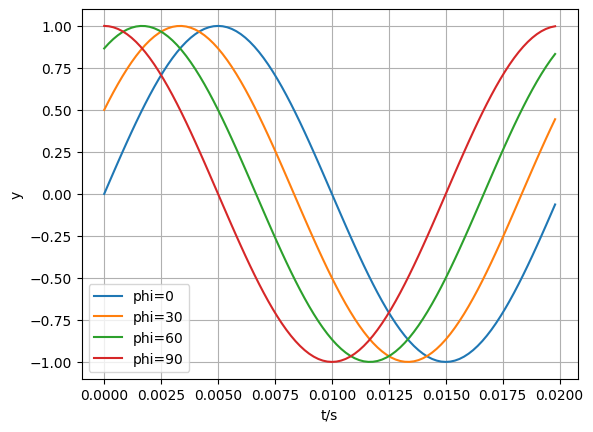

In [13]:
# f=50 hz
fs = 5000
t = 0.02
A = 1

hz_50 = gen_sine_wave(A=A, f=50, fs=fs, phi=0, t=t)
hz_50_30 = gen_sine_wave(A=A, f=50, fs=fs, phi=30, t=t)
hz_50_60 = gen_sine_wave(A=A, f=50, fs=fs, phi=60, t=t)
hz_50_90 = gen_sine_wave(A=A, f=50, fs=fs, phi=90, t=t)

x = np.arange(0, t, 1/fs)
plt.xlabel('t/s')
plt.ylabel('y')
plt.grid()
plt.plot(x, hz_50, label='phi=0')
plt.plot(x, hz_50_30, label='phi=30')
plt.plot(x, hz_50_60, label='phi=60')
plt.plot(x, hz_50_90, label='phi=90')
plt.legend()